In [1]:
import os,sys,string, time
import ROOT
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle
from particle import Particle

import Utilities.Functions as Functions
import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
from Utilities.ipython_exit import exit

print ('Success')


Welcome to JupyROOT 6.24/06
Success


# Purpose
The purpose of this script is to look at the kinematics of the various samples before and after selections. It should be able to inform decisions made in the full analysis chain. 

The kinematics vary signficantly between different masses of HNL, this script should make plots which give insight into those differences.

# Reading in .pkl files

In [2]:
av_HNL_direction = [0.32, 0.74, -0.59] #obtianed from the weighted files, which save the HNL momenta

Run = "run1" #so far either "run1" or "run3"

load_lepton_signal = False
load_pi0_signal = True

FLATTEN = False #Mostly put as False

Truth_vars = True

only_presel = False

load_bkgs = False

signal_like = False #Should set lepton and pi0 loading vars to False

if FLATTEN == True:
    Flat_state = "flattened"
else:
    Flat_state = "unflattened"
    
if only_presel:
    variables_string = "Presel_vars"
elif Truth_vars:
    variables_string = "Truth_vars"
else:
    variables_string = "my_vars"

print(f"Loading {Run} pickles")

loc_pkls = f"pkl_files/{Run}/current_files/{variables_string}/"

if load_bkgs == True:
    overlay_from_pkl = pd.read_pickle(loc_pkls+f"overlay_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
    dirt_from_pkl = pd.read_pickle(loc_pkls+f"dirt_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
    EXT_from_pkl = pd.read_pickle(loc_pkls+f"EXT_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
    print("Overlay .pkl is "+str(len(overlay_from_pkl))+" entries long.")
    print("Dirt .pkl is "+str(len(dirt_from_pkl))+" entries long.")
    print("EXT .pkl is "+str(len(EXT_from_pkl))+" entries long.")

signal_samples_dict = {}

# HNL_masses = [20, 50, 100, 150, 180, 200]
HNL_masses = Constants.HNL_mass_samples

if load_lepton_signal == True:
    for HNL_mass in HNL_masses:
        # signal_from_pkl = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
        signal_from_pkl = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
        signal_samples_dict[HNL_mass] = signal_from_pkl
        print(f"{HNL_mass}MeV Signal .pkl is "+str(len(signal_samples_dict[HNL_mass]))+" entries long.")
    
if load_pi0_signal == True:
    pi0_signal_samples_dict = {}
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        # signal_from_pkl = pd.read_pickle(loc_pkls+f"pi0_signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_truth.pkl")
        signal_from_pkl = pd.read_pickle(loc_pkls+f"pi0_signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_truth.pkl")
        # pi0_signal_samples_dict[HNL_mass] = signal_from_pkl
        signal_samples_dict[HNL_mass] = signal_from_pkl
        print(f"{HNL_mass}MeV pi0 signal .pkl is "+str(len(signal_samples_dict[HNL_mass]))+" entries long.")

elif signal_like == True:
    signal_like_dict = {}
    pkl_variable_tests_loc = f"pkl_files/{Run}/current_files/Variable_tests/"
    for HNL_mass in HNL_masses:
        signal_from_pkl = pd.read_pickle(pkl_variable_tests_loc+f"signal_like_{HNL_mass}_MeV.pkl")
        signal_like_dict[HNL_mass] = signal_from_pkl
        print(f"{HNL_mass}MeV Signal .pkl is "+str(len(signal_like_dict[HNL_mass]))+" entries long.")
        
print(f"Successfully loaded {Run} pkls")

Loading run1 pickles
150MeV pi0 signal .pkl is 30261 entries long.
180MeV pi0 signal .pkl is 36452 entries long.
200MeV pi0 signal .pkl is 35238 entries long.
220MeV pi0 signal .pkl is 36868 entries long.
240MeV pi0 signal .pkl is 35264 entries long.
245MeV pi0 signal .pkl is 36698 entries long.
Successfully loaded run1 pkls


In [3]:
signal_samples_dict[150]['mc_pdg']

entry
0        [111, -12]
1        [111, -12]
2        [111, -12]
3        [111, -12]
4        [111, -12]
            ...    
30256    [111, -12]
30257    [111, -12]
30258     [111, 12]
30259     [111, 12]
30260    [111, -12]
Name: mc_pdg, Length: 30261, dtype: object

In [5]:
eleven = Particle.from_pdgid(11)
twelve = Particle.from_pdgid(12)
thirteen = Particle.from_pdgid(13)
fourteen = Particle.from_pdgid(14)
one_one_one = Particle.from_pdgid(111)

print("eleven is " + str(eleven))
print("twelve is " + str(twelve))
print("thirteen is " + str(thirteen))
print("fourteen is " + str(fourteen))
print(one_one_one)

eleven is e-
twelve is nu(e)
thirteen is mu-
fourteen is nu(mu)
pi0


In [6]:
FLATTEN = True
Flat_state = "flattened"

flat_samples_dict = {}

#Loading files for filtering ee events
if load_lepton_signal == True:
    for HNL_mass in HNL_masses:
        # signal_from_pkl = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
        signal_from_pkl = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_truth.pkl")
        flat_samples_dict[HNL_mass] = signal_from_pkl
        print(f"{HNL_mass}MeV Signal .pkl is "+str(len(flat_samples_dict[HNL_mass]))+" entries long.")
    
if load_pi0_signal == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        signal_from_pkl = pd.read_pickle(loc_pkls+f"pi0_signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_truth.pkl")
        flat_samples_dict[HNL_mass] = signal_from_pkl
        print(f"{HNL_mass}MeV pi0 signal .pkl is "+str(len(flat_samples_dict[HNL_mass]))+" entries long.")

elif signal_like == True:
    signal_like_dict = {}
    pkl_variable_tests_loc = f"pkl_files/{Run}/current_files/Variable_tests/"
    for HNL_mass in HNL_masses:
        signal_from_pkl = pd.read_pickle(pkl_variable_tests_loc+f"signal_like_{HNL_mass}_MeV.pkl")
        flat_samples_dict[HNL_mass] = signal_from_pkl
        print(f"{HNL_mass}MeV Signal .pkl is "+str(len(signal_like_dict[HNL_mass]))+" entries long.")
        
print(f"Successfully loaded {Run} pkls")

150MeV pi0 signal .pkl is 60522 entries long.
180MeV pi0 signal .pkl is 72904 entries long.
200MeV pi0 signal .pkl is 70476 entries long.
220MeV pi0 signal .pkl is 73736 entries long.
240MeV pi0 signal .pkl is 70528 entries long.
245MeV pi0 signal .pkl is 73396 entries long.
Successfully loaded run1 pkls


In [7]:
# signal_samples_dict[150].keys()
flat_samples_dict[150].head()

run  sub  evt  mc_pdg      mc_E       mc_vx      mc_vy  \
entry subentry                                                            
0     0         6086    0   11     111  0.222314  106.681755  84.816330   
      1         6086    0   11     -12  0.036006  106.681755  84.816330   
1     0         6086    1   65     111  0.222523  109.963104  10.085696   
      1         6086    1   65     -12  0.035797  109.963104  10.085696   
2     0         6086    1   79     111  0.227046   18.000368 -78.940636   

                     mc_vz       mc_endx       mc_endy       mc_endz  \
entry subentry                                                         
0     0          35.105278    106.681755     84.816338     35.105278   
      1          35.105278  21276.679688  43453.976562 -74163.000000   
1     0         557.476196    109.963104     10.085699    557.476196   
      1         557.476196  56481.285156  53000.000000 -73779.234375   
2     0         913.249390     18.000370    -78.940636    913.249390   

                   mc_px     mc_py     mc_pz  
entry subentry                                
0     0         0.059269  0.133509 -0.099335  
      1         0.008612  0.017642 -0.030183  
1     0         0.047501  0.137261 -0.100999  
      1         0.018808  0.017680 -0.024802  
2     0         0.055432  0.131048 -0.114388

## Remove e, mu, nu events

In [8]:
#Make rse_id
for HNL_mass in signal_samples_dict:
    signal_samples_dict[HNL_mass] = Functions.make_unique_ev_id(signal_samples_dict[HNL_mass])
    flat_samples_dict[HNL_mass] = Functions.make_unique_ev_id(flat_samples_dict[HNL_mass])


In [14]:
#channels: nu,e+,e-, nu,mu,e, nu,mu+,mu- 
#need pdgs of minus 11 and 11. 
e_e_evs = {}
mu_e_evs = {}
mu_plus_e_evs = {}
mu_mu_evs = {}
mu_nu_mu_bar_evs = {}
electrons_dict = {}
positrons_dict = {}

pi0_dict = {}
nu_dict = {}

if load_lepton_signal == True:
    for HNL_mass in signal_samples_dict:
        print(f"Original length is of {HNL_mass}MeV " + str(len(flat_samples_dict[HNL_mass])))
        elec = flat_samples_dict[HNL_mass].query("mc_pdg==11")
        positron = flat_samples_dict[HNL_mass].query("mc_pdg==-11")
        
        mu = flat_samples_dict[HNL_mass].query("mc_pdg==13")
        mu_bar = flat_samples_dict[HNL_mass].query("mc_pdg==-13")
        nu_mu_bar = flat_samples_dict[HNL_mass].query("mc_pdg==-14")

        electrons_dict[HNL_mass] = elec
        positrons_dict[HNL_mass] = positron

        e_e = Functions.make_common_evs_df([elec, positron])
        mu_e = Functions.make_common_evs_df([positron, mu])
        mu_plus_e = Functions.make_common_evs_df([mu_bar, elec])
        mu_mu = Functions.make_common_evs_df([mu, mu_bar])
        mu_nu_mu_bar = Functions.make_common_evs_df([mu_bar, nu_mu_bar])
        # mu_mu = Functions.make_common_evs_df([mu, mu_bar, nu_mu_bar])
        
        e_e_evs[HNL_mass]=e_e
        mu_e_evs[HNL_mass]=mu_e
        mu_plus_e_evs[HNL_mass]=mu_plus_e
        mu_mu_evs[HNL_mass]=mu_mu
        mu_nu_mu_bar_evs[HNL_mass]=mu_nu_mu_bar
        # print("Num ee decays is " + str(len(common_evs[HNL_mass])*2))
common_evs = {}
if load_pi0_signal == True: 
    for HNL_mass in signal_samples_dict:
        print(f"Original length is of FLAT {HNL_mass}MeV " + str(len(flat_samples_dict[HNL_mass])))
        print(f"Original length is of {HNL_mass}MeV " + str(len(signal_samples_dict[HNL_mass])))
        pi0 = flat_samples_dict[HNL_mass].query("mc_pdg==111")
        nu = flat_samples_dict[HNL_mass].query("mc_pdg==-12 or mc_pdg==12")

        pi0_dict[HNL_mass] = pi0
        nu_dict[HNL_mass] = nu

        common = Functions.make_common_evs_df([pi0, nu])
        common_evs[HNL_mass]=common

        print("Num pi0 decays is " + str(len(common_evs[HNL_mass])))

Original length is of FLAT 150MeV 60522
Original length is of 150MeV 30261
Length is of common events list is 30261
Num pi0 decays is 30261
Original length is of FLAT 180MeV 72904
Original length is of 180MeV 36452
Length is of common events list is 36452
Num pi0 decays is 36452
Original length is of FLAT 200MeV 70476
Original length is of 200MeV 35238
Length is of common events list is 35238
Num pi0 decays is 35238
Original length is of FLAT 220MeV 73736
Original length is of 220MeV 36868
Length is of common events list is 36868
Num pi0 decays is 36868
Original length is of FLAT 240MeV 70528
Original length is of 240MeV 35264
Length is of common events list is 35264
Num pi0 decays is 35264
Original length is of FLAT 245MeV 73396
Original length is of 245MeV 36698
Length is of common events list is 36698
Num pi0 decays is 36698


In [ ]:
frac_ee, frac_mumu, frac_emu = {}, {}, {}
frac_all_mus, frac_all_emus = {}, {}
if load_lepton_signal == True:
    for HNL_mass in signal_samples_dict:
        frac_ee[HNL_mass] = len(e_e_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_mumu[HNL_mass] = len(mu_mu_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_emu[HNL_mass] = len(mu_e_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_all_emus[HNL_mass] = (len(mu_e_evs[HNL_mass])+len(mu_plus_e_evs[HNL_mass]))/len(signal_samples_dict[HNL_mass])
        frac_all_mus[HNL_mass] = (len(mu_mu_evs[HNL_mass])+len(mu_nu_mu_bar_evs[HNL_mass]))/len(signal_samples_dict[HNL_mass])
        
        print(f"{HNL_mass} emu frac is " + str(frac_all_emus[HNL_mass]))


In [ ]:
frac_ee.keys()
print(len(frac_ee.keys()))
e_mu_plus_ee, mu_mu_plus_others = {}, {}
for HNL_mass in signal_samples_dict:
    e_mu_plus_ee[HNL_mass] =  frac_ee[HNL_mass]+frac_all_emus[HNL_mass]
    print(e_mu_plus_ee[HNL_mass])
    mu_mu_plus_others[HNL_mass] = e_mu_plus_ee[HNL_mass] + frac_mumu[HNL_mass]
print(frac_ee.values())
print(e_mu_plus_ee.values())

In [ ]:
x_int_list = range(0, len(frac_ee.keys()))
plt.bar(x_int_list, frac_ee.values(), label=r"$\nu e^{+}e^{-}$", tick_label=list(frac_ee.keys()))
plt.bar(x_int_list, frac_all_emus.values(), label=r"$\nu e\mu$", tick_label=list(frac_ee.keys()), bottom=list(frac_ee.values()))
plt.bar(x_int_list, frac_all_mus.values(), label=r"$\nu \mu\mu$", tick_label=list(frac_ee.keys()),bottom=list(e_mu_plus_ee.values()))

plt.axhline(1.0,ls="--", color="black")
plt.ylabel("Fraction of events")
plt.xlabel("HNL mass [MeV]")
plt.xlim(-0.5, 13)
plt.legend(fontsize=22, loc="center right")

plt.savefig("plots/Generator/channel_fractions_current_samples.pdf")

In [15]:
common_evs.keys()

dict_keys([150, 180, 200, 220, 240, 245])

In [16]:
signal_samples_dict.keys()

dict_keys([150, 180, 200, 220, 240, 245])

In [17]:
# common_evs = e_e_evs
filtered_dict, filtered_out_dict = {}, {}
no_emu, no_category_dict = {}, {}
nothing_dict, final_nothing_dict = {}, {}

for HNL_mass in signal_samples_dict:
    filtered_dict[HNL_mass] = signal_samples_dict[HNL_mass].loc[(signal_samples_dict[HNL_mass]['rse_id'].isin(common_evs[HNL_mass]['rse_id']))]
    filtered_out_dict[HNL_mass] = signal_samples_dict[HNL_mass].loc[(~signal_samples_dict[HNL_mass]['rse_id'].isin(common_evs[HNL_mass]['rse_id']))]
    
#     no_emu[HNL_mass] =filtered_out_dict[HNL_mass].loc[(~filtered_out_dict[HNL_mass]['rse_id'].isin(mu_e_evs[HNL_mass]['rse_id']))]
#     no_category_dict[HNL_mass] =no_emu[HNL_mass].loc[(~no_emu[HNL_mass]['rse_id'].isin(mu_mu_evs[HNL_mass]['rse_id']))]
#     nothing_dict[HNL_mass] =no_category_dict[HNL_mass].loc[(~no_category_dict[HNL_mass]['rse_id'].isin(mu_nu_mu_bar_evs[HNL_mass]['rse_id']))]
#     final_nothing_dict[HNL_mass]=nothing_dict[HNL_mass].loc[(~nothing_dict[HNL_mass]['rse_id'].isin(mu_plus_e_evs[HNL_mass]['rse_id']))]
# print(len(final_nothing_dict[245]))


In [ ]:
# eleven is e-
# twelve is nu(e)
# thirteen is mu-
# fourteen is nu(mu)
# print(len(nothing_dict[240]))
# final_nothing_dict[240]["mc_pdg"].head(30)

In [18]:
filtered_index_dict = {}
for HNL_mass in signal_samples_dict:
    filtered_index_dict[HNL_mass] = filtered_dict[HNL_mass].index


In [20]:
Num_evs = len(signal_samples_dict[150])
print(Num_evs)
entries = np.arange(0, Num_evs,1)
print(entries)

30261
[    0     1     2 ... 30258 30259 30260]


## Creating new variables

In [21]:
print(signal_samples_dict[150]['mc_E'][0][0]/signal_samples_dict[150]['mc_E'][0][1])
df = signal_samples_dict[150]
dot_product = (df['mc_px'][0]*df['mc_px'][1] + df['mc_py'][0]*df['mc_py'][1] + df['mc_pz'][0]*df['mc_pz'][1])
print(type(dot_product))
print(dot_product)
print(df['mc_px'][0])
print(max(df['mc_px'][0]))
print(min(df['mc_px'][0]))

print("Num evs is " + str(len(signal_samples_dict[150])))

6.17438
<class 'numpy.ndarray'>
[0.03117357 0.00122246]
[0.05926927 0.00861174]
0.059269268
0.00861174
Num evs is 30261


In [22]:
def Make_new_variables(df, entries=[]): #For unflattened dfs
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    mc_p_magnitude = []
    mc_px_sum, mc_py_sum, mc_pz_sum = [], [], []
    mc_E_leading, mc_E_sub, mc_E_asymmetry = [], [], []
    mc_cos_opening_angle, mc_opening_angle = [], []
    
    # for i in range(Num_evs):
    for i in entries_it:
        mc_p1 = np.sqrt(df['mc_px'][i][0]**2+df['mc_py'][i][0]**2+df['mc_pz'][i][0]**2)
        mc_p2 = np.sqrt(df['mc_px'][i][1]**2+df['mc_py'][i][1]**2+df['mc_pz'][i][1]**2)
        mc_p_magnitude.append(np.array([mc_p1,mc_p2]))
        mc_px_sum.append(df['mc_px'][i][0]+df['mc_px'][i][1])
        mc_py_sum.append(df['mc_py'][i][0]+df['mc_py'][i][1])
        mc_pz_sum.append(df['mc_pz'][i][0]+df['mc_pz'][i][1])
        mc_E_leading.append(max(df['mc_E'][i]))
        mc_E_sub.append(min(df['mc_E'][i]))
        mc_E_asymmetry.append(min(df['mc_E'][i]) / max(df['mc_E'][i]))
        
        dot_product = (df['mc_px'][i][0]*df['mc_px'][i][1] + df['mc_py'][i][0]*df['mc_py'][i][1] + df['mc_pz'][i][0]*df['mc_pz'][i][1])
        magnitude_dot_product = mc_p1*mc_p2
        mc_cos_opening_angle.append(dot_product/magnitude_dot_product)
        mc_opening_angle.append(np.arccos(dot_product/magnitude_dot_product))
        
        
    df2 = df.copy()
    df2["mc_px_sum"], df2["mc_py_sum"], df2["mc_pz_sum"] = np.array(mc_px_sum), np.array(mc_py_sum), np.array(mc_pz_sum)
    df2["mc_p_magnitude"] = mc_p_magnitude
    df2["mc_E_leading"], df2["mc_E_sub"] = np.array(mc_E_leading), np.array(mc_E_sub)
    df2["mc_E_asymmetry"] = np.array(mc_E_asymmetry)
    df2["mc_cos_opening_angle"] = np.array(mc_cos_opening_angle)
    df2["mc_opening_angle"] = np.array(mc_opening_angle)
   
    return df2

def Make_angle_wrt(df, vector, entries=[]):
    """
    Vector should be a unit vector, for the desired direction. 
    """
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    
    polar_angle = []
    # for i in range(Num_evs):
    for i in entries_it:
        direction = vector[0]*df["mc_px_sum"][i] + vector[1]*df["mc_py_sum"][i] + vector[2]*df["mc_pz_sum"][i]
        p_sum = np.sqrt(df["mc_px_sum"][i]+df["mc_py_sum"][i]+df["mc_pz_sum"][i])
        polar_angle.append(np.arccos(direction/p_sum))
        
    df2 = df.copy()
    df2["mc_polar_angle"] = np.array(polar_angle)
    
    return df2

def Make_single_new_variables(df, rest_mass, entries=[]):
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    
    mc_p_magnitude = []
    mc_E_kinetic = []
    for i in entries_it:
        mc_p = np.sqrt(df['mc_px'][i]**2+df['mc_py'][i]**2+df['mc_pz'][i]**2)
        mc_E = df['mc_E'][i] - rest_mass
        
        mc_p_magnitude.append(mc_p)
        mc_E_kinetic.append(mc_E)
        
    df2 = df.copy()
    df2["mc_p_magnitude"] = mc_p_magnitude
    df2["mc_E_kinetic"] = mc_E_kinetic
    
    return df2

def Make_single_angle(df, vector, entries=[]):
    """
    Vector should be a unit vector, for the desired direction. 
    """
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    
    polar_angle = []
    # for i in range(Num_evs):
    for i in entries_it:
        direction = vector[0]*df["mc_px"][i] + vector[1]*df["mc_py"][i] + vector[2]*df["mc_pz"][i]
        p_sum = np.sqrt(df["mc_px"][i]+df["mc_py"][i]+df["mc_pz"][i])
        polar_angle.append(np.arccos(direction/p_sum))
        
    df2 = df.copy()
    df2["mc_polar_angle_single"] = np.array(polar_angle)
    
    return df2


In [ ]:
for HNL_mass in signal_samples_dict:
    # signal_samples_dict[HNL_mass]=Make_new_variables(signal_samples_dict[HNL_mass], filtered_index_dict[HNL_mass])
    signal_samples_dict[HNL_mass]=Make_new_variables(signal_samples_dict[HNL_mass], signal_samples_dict[HNL_mass].index)
    print(f"Done {HNL_mass}MeV")
print("Done")
    
# direction = [0, 0, 1]
direction = av_HNL_direction

for HNL_mass in signal_samples_dict:
    signal_samples_dict[HNL_mass]=Make_angle_wrt(signal_samples_dict[HNL_mass], direction, [])
    # if load_pi0_signal == True:
    #     pi0_dict[HNL_mass]=Make_single_angle(pi0_dict[HNL_mass], direction, filtered_index_dict[HNL_mass])
    print(f"Done {HNL_mass}MeV")
# test_df = Make_new_variables(signal_samples_dict[2])

In [23]:
signal_samples_dict[150].keys()

Index(['run', 'sub', 'evt', 'mc_pdg', 'mc_E', 'mc_vx', 'mc_vy', 'mc_vz',
       'mc_endx', 'mc_endy', 'mc_endz', 'mc_px', 'mc_py', 'mc_pz', 'rse_id'],
      dtype='object')

In [24]:
pi0_dict[150].head()

,,run,sub,evt,mc_pdg,mc_E,mc_vx,mc_vy,mc_vz,mc_endx,mc_endy,mc_endz,mc_px,mc_py,mc_pz,rse_id
entry,subentry,,,,,,,,,,,,,,,
0,0,6086,0,11,111,0.222314,106.681755,84.816330,35.105278,106.681755,84.816338,35.105278,0.059269,0.133509,-0.099335,6086_0_11
1,0,6086,1,65,111,0.222523,109.963104,10.085696,557.476196,109.963104,10.085699,557.476196,0.047501,0.137261,-0.100999,6086_1_65
2,0,6086,1,79,111,0.227046,18.000368,-78.940636,913.249390,18.000370,-78.940636,913.249390,0.055432,0.131048,-0.114388,6086_1_79
3,0,6086,1,86,111,0.220682,73.748299,-7.903503,111.764519,73.748299,-7.903503,111.764519,0.047498,0.124324,-0.113002,6086_1_86
4,0,6086,2,128,111,0.225179,152.512024,-35.800766,309.179901,152.512024,-35.800762,309.179901,0.070793,0.127239,-0.106232,6086_2_128


In [25]:
pi0_mass = 0.135 #GeV
direction = av_HNL_direction
if load_pi0_signal == True:
    for HNL_mass in pi0_dict:
        pi0_dict[HNL_mass]=Make_single_new_variables(pi0_dict[HNL_mass], pi0_mass, entries=pi0_dict[HNL_mass].index)
        pi0_dict[HNL_mass]=Make_single_angle(pi0_dict[HNL_mass], direction, entries=pi0_dict[HNL_mass].index)
        print(f"Done {HNL_mass}")

Done 150


/home/david/jupyter/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in arccos
/home/david/jupyter/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in sqrt


Done 180
Done 200
Done 220
Done 240
Done 245


# Functions

In [26]:
def Plot_variable_signal(variable, HNL_samples_dict=[], xlabel=[], xlims=[0,0], bins=40, figsize=[10,10], dpi=100, xticks=[], 
                         density=True,legloc="best",logy = False, cutline = None, savefig=False, filename=None, plot_entries=False,fraction=False):
    
    if(HNL_samples_dict==[]): raise Exception("Specify samples dict") 
    if(xlabel==[]): xlabel=variable
    
    if logy == True:
        logscale="log"
    elif logy == False:
        logscale="linear"
    
    fig,ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=figsize,dpi=dpi)
    
    for HNL_mass in HNL_samples_dict:
    
        #var_HNL=HNL_samples_dict[HNL_mass][variable] #old way when specifying variable
        var_HNL=HNL_samples_dict[HNL_mass]
        Num_entries = len(var_HNL)
       
        if xlims[0] == 0 and xlims[1] == 0: xlims = [min(var_HNL),max(var_HNL)]
    
        if(isinstance(bins, int)):
            nbins=bins
            bins=np.linspace(xlims[0],xlims[1],nbins+1)
        else: nbins=len(bins)-1
    
    #plt.sca(ax[0])
               
        if plot_entries==True: label=[f"{HNL_mass} MeV HNL: " + str(Num_entries) + " entries"]
        if plot_entries==False: label=[f"{HNL_mass} MeV HNL"]
                   
        if fraction == False:
            plt.hist(var_HNL,
    #               label=[f"HNL ({mass} MeV) \n $|U_{{\mu4}}|^2="+sci_notation(sample_info["300"]["theta_u2"]) +f" (x{HNLplotscale})"],
                  label=label,
                  range=xlims,bins=bins,
                  stacked=False,density=density,
                  histtype="step",lw=3)
        if fraction == True:
            plt.hist(var_HNL,weights=np.ones(len(var_HNL)) / len(var_HNL),
                     label=label,
                  range=xlims,bins=bins,
                  stacked=False,density=False,
                  histtype="step",lw=3)
    
    if(isinstance(cutline, (int,float))):
        plt.axvline(x=cutline, lw=3, color='green', linestyle = 'dashed')
    
    if(logy == True):
        plt.yscale("log")
    else:
        plt.yscale("linear")
        
    if(density == True):
        plt.ylabel("Fraction of total events")
    
    plt.legend(loc=legloc,frameon=False)
    
    plt.xlabel(xlabel)
    plt.xlim(xlims)
    if xticks != []:
        plt.xticks(xticks)
    # plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.tight_layout()
    plt.yscale(logscale)
    if filename == None:
        Name = variable + "_" + Run + "_" + logscale
    else:
        Name = filename
    if savefig == True:
        plt.savefig("plots/Truth_studies/Signal_plots/" + Name + ".png")
        plt.savefig("plots/Truth_studies/Signal_plots/" + Name + ".pdf")

In [27]:
def check_variable(df,variable,debug=True): #The df should NOT be flattened. Will return a series which can be plotted. 
    first_entry = df.index[0]
    if isinstance(df[variable][first_entry], (np.ndarray)):
        if(debug):print("This variable has an array of entries per event.")
        Num_events = len(df[variable])
        if(debug):print("The total number of events is " + str(Num_events))
        copy_column = df[variable].copy()
        exploded = copy_column.explode(variable)
        Num_nans = exploded.isna().sum()
        if(debug):print("The number of events with empty arrays is " + str(Num_nans))
        if(debug):print("Fraction of non-empty arrays is " + str(1-(Num_nans/Num_events)))
        Nans_removed = exploded.dropna()
        Num_entries = len(Nans_removed)
        if(debug):print("The total number of entries is " + str(Num_entries))
        
        return Nans_removed, Num_entries
    if isinstance(df[variable][first_entry], (int,float,np.int32,np.float32,np.uint32,np.nan)):
        if(debug):print("This variable has one entry per event.")
        Num_events = len(df[variable])
        if(debug):print("The total number of events is " + str(Num_events))
        copy_column = df[variable].copy()
        Num_nans = copy_column.isna().sum()
        if Num_nans != 0:
            if(debug):print("There are " + str(Num_nans) + " Nan values, removing now")
            copy_column.dropna()
        Num_entries = len(copy_column)
        return copy_column, Num_entries
    else: print("Not sure what type this variable is!")
    
def remove_non_reco_vals(df,debug=True): #Feed in the output of the check_variable
    #value = -1e15
    value = -9998
    first_entry = df.index[0]
    if(debug):print("Total number of entries is " + str(len(df)))
    if(debug):print("Number of very negative values is " + str(len(df.loc[df < value])))

    if(len(df.loc[df < value]) > 0):
        new_df = df.drop(df.loc[df < value].index) #Removes values entirely
        if(debug):print("New number of entries is " + str(len(new_df)))
            # if(len(df.loc[df == -1.0]) > 0):
            #     df.loc[(df == -1.0), variable] = new_value #Sets the new value
            # if(len(df.loc[df == np.nan]) > 0):
            #     df.loc[(df == np.nan), variable] = new_value #Sets the new value
            # if(len(df.loc[df == np.inf]) > 0):
            #     df.loc[(df == np.inf), variable] = new_value #Sets the new value
    else: new_df = df.copy()
    return new_df, len(new_df)

In [28]:
variable_names_dict = {'mc_px_sum':"Sum of x-momenta [GeV]", 'mc_py_sum':"Sum of y-momenta [GeV]", 'mc_pz_sum':"Sum of z-momenta [GeV]",
                       'mc_p_magnitude':"Magnitude of lepton momenta [GeV]", 'mc_E_leading':"Leading lepton energy [GeV]",
                       'mc_E':"Energy [GeV]", 'mc_px':"Momentum in x-direction [GeV]", 'mc_py':"Momentum in y-direction [GeV]",
                       'mc_pz':"Momentum in z-direction [GeV]", 'mc_p_magnitude':"Momentum [GeV]", 'mc_E_kinetic':"Kinetic energy [GeV]",
       'mc_E_sub':"Sub-leading lepton energy [GeV]", 'mc_E_asymmetry':"Energy asymmetry", 'mc_cos_opening_angle':"cosine(opening angle)",
       'mc_opening_angle':"Opening angle [radians]", 'mc_polar_angle':"Angle w.r.t parent HNL [radians]",
                       "mc_polar_angle_single":"Angle w.r.t parent HNL [radians]"}


In [29]:
Plot_only_lepton = False #Final state is e+e-
Plot_only_pi0 = True #Final state is pi0

if Plot_only_lepton == True: sample_dict = signal_samples_dict
elif Plot_only_pi0 == True: sample_dict = pi0_dict
elif signal_like == True: sample_dict = signal_like_dict

print_vals = input("Do you want to print all the variables in the sample? y/n ")
if print_vals == "y":
    var_list = []
    for var in sample_dict[150].keys():
        var_list.append(var)
    print(var_list)
else:
    print("Not printing variables.")

Do you want to print all the variables in the sample? y/n  y


['run', 'sub', 'evt', 'mc_pdg', 'mc_E', 'mc_vx', 'mc_vy', 'mc_vz', 'mc_endx', 'mc_endy', 'mc_endz', 'mc_px', 'mc_py', 'mc_pz', 'rse_id', 'mc_p_magnitude', 'mc_E_kinetic', 'mc_polar_angle_single']


In [30]:
var = 'mc_p_magnitude'
plot_dict = {}
Num_entries_dict = {}
debug = False

plot_all_masses = False
if plot_all_masses == True: plot_samples = sample_dict.keys()
if plot_all_masses == False: plot_samples = [150, 180, 200, 240, 245]

for sample in plot_samples:
    print(f"Mass is {sample} MeV")
    plot_dict[sample], Num_entries_dict[sample] = check_variable(sample_dict[sample],var,debug=debug)
    plot_dict[sample], Num_entries_dict[sample] = remove_non_reco_vals(plot_dict[sample],debug=debug)
    
print()
var_2 = 'mc_polar_angle_single'
plot_dict_2 = {}
Num_entries_dict_2 = {}

for sample in plot_samples:
    print(f"Mass is {sample} MeV")
    plot_dict_2[sample], Num_entries_dict_2[sample] = check_variable(sample_dict[sample],var_2,debug=debug)
    plot_dict_2[sample], Num_entries_dict_2[sample] = remove_non_reco_vals(plot_dict_2[sample],debug=debug)
    
# plot_dict[150].head()
# Particle.from_pdgid(11)
print()
var_3 = 'mc_E_kinetic'
plot_dict_3 = {}
Num_entries_dict_3 = {}
if load_pi0_signal == True:
    for sample in pi0_dict:
        print(f"Mass is {sample} MeV")
        plot_dict_3[sample], Num_entries_dict_3[sample] = check_variable(pi0_dict[sample],var_3,debug=debug)
        plot_dict_3[sample], Num_entries_dict_3[sample] = remove_non_reco_vals(plot_dict_3[sample],debug=debug)

Mass is 150 MeV
Mass is 180 MeV
Mass is 200 MeV
Mass is 240 MeV
Mass is 245 MeV

Mass is 150 MeV
Mass is 180 MeV
Mass is 200 MeV
Mass is 240 MeV
Mass is 245 MeV

Mass is 150 MeV
Mass is 180 MeV
Mass is 200 MeV
Mass is 220 MeV
Mass is 240 MeV
Mass is 245 MeV


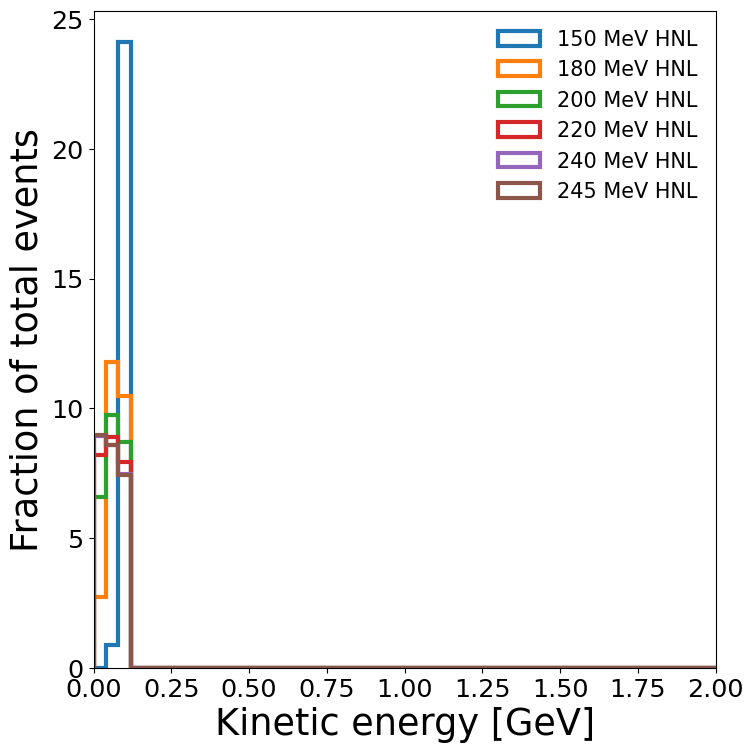

In [31]:
if load_pi0_signal == True:
    Plot_variable_signal(var_3, HNL_samples_dict=plot_dict_3, xlabel=variable_names_dict[var_3], xlims=[0,2.0], bins=50, 
                     figsize=[8,8], dpi=100, xticks=[], density=True,legloc="best",logy = False,
                     cutline = None, savefig=True, filename = f"pi0_{var_3}_{Run}")

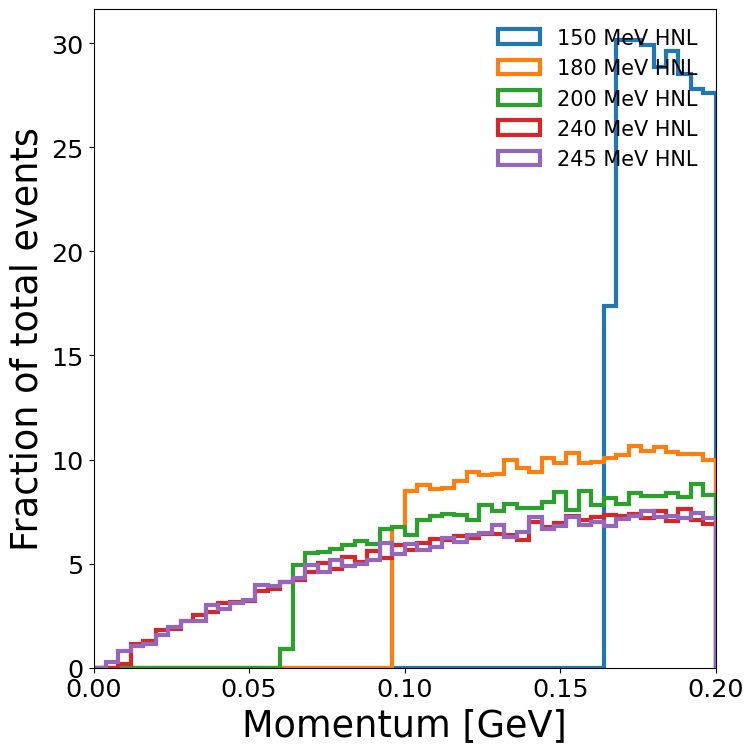

In [32]:
#mc_E Includes rest mass I believe. 
x_ticks = [0,0.05,0.1, 0.15, 0.2]
Plot_variable_signal(var, HNL_samples_dict=plot_dict, xlabel=variable_names_dict[var], xlims=[0,0.2], bins=50, 
                     figsize=[8,8], dpi=100, xticks=x_ticks, density=True,legloc="best",logy = False,
                     cutline = None, savefig=True, filename = f"pi0_{var}_{Run}")
# plt.xticks([0,0.05,0.1, 0.15, 0.2])
# plt.ylim([0,10])
# max_y, bin_edges = np.histogram(plot_dict[150], density=True, bins=40)
# maxium = max(max_y)
# max_x = max(bin_edges)
# min_x = min(bin_edges)
# print(maxium)
# print(max_x)
# print(min_x)
# print("Max minus min is " + str(max_x - min_x))
# plt.ylim(0, maxium*1.3)

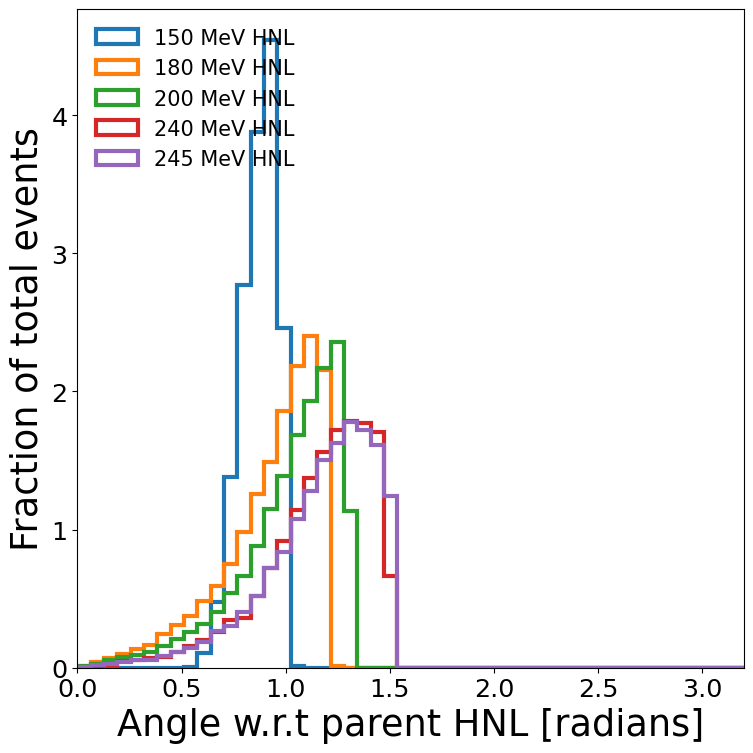

In [34]:
Plot_variable_signal(var_2, HNL_samples_dict=plot_dict_2, xlabel=variable_names_dict[var_2], xlims=[0,3.2], bins=50, 
                     figsize=[8,8], dpi=100, xticks=[], density=True,legloc="upper left",logy = False,
                     cutline = None, savefig=True, filename = f"pi0_{var_2}_{Run}")

In [ ]:
sample_dict[220].keys()

## 2D histogram of reco showers and tracks

In [ ]:
a = np.arange(5) - 0.5
print(a)
#previously [0,4]

In [ ]:
#HNL_mass = 20
savefig=True

for HNL_mass in plot_dict.keys():

    n_showers = plot_dict_2[HNL_mass]
    n_tracks = plot_dict[HNL_mass]

    width = 10
    aspect = 0.9
    height = width*aspect
    plt.figure(figsize=(width,height))
    
    BINS = np.arange(5)-0.5
    lims = [-1, 5]
    ticks = [0,1, 2, 3]
    old_bins = 4
    old_lims = [0,4]

    plt.hist2d(n_showers, n_tracks, bins = BINS, range=[lims,lims], density=True)

    counts, xedges, yedges, Image = plt.hist2d(n_showers, n_tracks, bins = BINS, range=[lims,lims], density=True)

    dx = xedges[2]-xedges[1]
    dy = yedges[2]-yedges[1]
    for i in range(xedges.size-1):
        for j in range(yedges.size-1):
            xb = xedges[i] + 0.25*dx
            yb = yedges[j] + 0.4*dy
            plt.text(xb, yb, str(np.round(100.*counts[i,j],2)), fontsize=20)

    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.title(str(HNL_mass) + " MeV HNL")
    plt.xlabel("reconstructed showers")
    plt.ylabel("reconstructed tracks")
    plt.colorbar()
    plt.tight_layout()
    if savefig==True:
        Name = f"Reconstructed_objects_{HNL_mass}MeV_{Run}"
        if Plot_only_lepton == True: plt.savefig("plots/Truth_studies/Signal_plots/" + Name + ".png")
        if Plot_only_pi0 == True: plt.savefig("plots/Truth_studies/Signal_plots/pi0/" + Name + ".png")

## Multiplicity study

In [ ]:
def Make_fraction_recod(HNL_samples_dict=signal_samples_dict, variable='n_pfps'): #This should be fed with a dict of unflattened dataframes
    frac_pfps_dict = {}
    for HNL_mass in HNL_samples_dict:
        Placeholder_list = []
        Num_events = len(HNL_samples_dict[HNL_mass][variable])
        for i in range(max(HNL_samples_dict[HNL_mass][variable])):
            selection = HNL_samples_dict[HNL_mass].loc[(HNL_samples_dict[HNL_mass][variable] == i)]
            Num_multiplicity = len(selection)
            Placeholder_list.append(Num_multiplicity/Num_events)
        frac_pfps_dict[HNL_mass] = Placeholder_list
    return frac_pfps_dict

In [ ]:
frac_pfps_dict = Make_fraction_recod(HNL_samples_dict=sample_dict, variable='n_pfps')

print(frac_pfps_dict)

In [ ]:
HNL_mass = 150
selection = sample_dict[HNL_mass].loc[(sample_dict[HNL_mass]['n_pfps'] == 2)]

print(len(selection))

# End of code